# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # braking into list city_weather_1 = city_weather["weather"][0]["description"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sa'dah
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | aripuana
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | minas de marcona
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | bucerias
Processing Record 17 of Set 1 | las juntas
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | aki
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | grytviken
Proces

Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | maintirano
Processing Record 44 of Set 4 | kailua-kona
Processing Record 45 of Set 4 | siwa oasis
Processing Record 46 of Set 4 | fort frances
Processing Record 47 of Set 4 | petropavlovsk-kamchatsky
Processing Record 48 of Set 4 | hotan
Processing Record 49 of Set 4 | acoua
Processing Record 0 of Set 5 | itarantim
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | brigantine
Processing Record 3 of Set 5 | tazacorte
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | freeport
Processing Record 6 of Set 5 | san luis de la loma
Processing Record 7 of Set 5 | pangoa
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | aral
Processing Record 10 of Set 5 | berezovyy
Processing Record 11 of Set 5 | zaozersk
Processing Record 12 of Set 5 | mahina
Processing Record 13 of Set 5 | baiyin
Processing Record 14 of Set 5 | zhangye
Processing Record 15 of Set 5 | poxor

Processing Record 33 of Set 8 | pariaman
Processing Record 34 of Set 8 | novyy urengoy
Processing Record 35 of Set 8 | ushtobe
Processing Record 36 of Set 8 | raduzhny
Processing Record 37 of Set 8 | happy valley-goose bay
Processing Record 38 of Set 8 | frederick
Processing Record 39 of Set 8 | cidreira
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | saveh
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | landeck
Processing Record 44 of Set 8 | igrim
Processing Record 45 of Set 8 | howrah
Processing Record 46 of Set 8 | sedalia
Processing Record 47 of Set 8 | lepsy
Processing Record 48 of Set 8 | turpan
Processing Record 49 of Set 8 | norilsk
Processing Record 0 of Set 9 | palikir - national government center
Processing Record 1 of Set 9 | gueltat zemmour
City not found. Skipping...
Processing Record 2 of Set 9 | selfoss
Processing Record 3 of Set 9 | solleftea
Processing Record 4 of Set 9 | tadine
Processing Record 5 of Set 9 | phan rang-tha

Processing Record 26 of Set 12 | al qusiyah
Processing Record 27 of Set 12 | alexandria
Processing Record 28 of Set 12 | taghazout
Processing Record 29 of Set 12 | marion
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | colonel hill
Processing Record 32 of Set 12 | quesnel
Processing Record 33 of Set 12 | kayangel
Processing Record 34 of Set 12 | tromso
Processing Record 35 of Set 12 | notodden
Processing Record 36 of Set 12 | saint-joseph
Processing Record 37 of Set 12 | turkestan
Processing Record 38 of Set 12 | buka
Processing Record 39 of Set 12 | namtsy
Processing Record 40 of Set 12 | chifeng
Processing Record 41 of Set 12 | inhambane
Processing Record 42 of Set 12 | kadugli
Processing Record 43 of Set 12 | lae
Processing Record 44 of Set 12 | alotau
City not found. Skipping...
Processing Record 45 of Set 12 | ormara
Processing Record 46 of Set 12 | rajin
Processing Record 47 of Set 12 | fortuna
Processing Record 48 of Set 12 | galesong
Processing Record 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,28.00,80,47,9.87,MH,1701044143
1,ushuaia,-54.8000,-68.3000,4.48,85,99,1.34,AR,1701044006
2,sa'dah,16.9402,43.7639,14.45,47,59,1.84,YE,1701044143
3,stanley,54.8680,-1.6985,3.62,93,75,0.00,GB,1701044143
4,waitangi,-43.9535,-176.5597,16.57,97,77,7.60,NZ,1701044143


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.00,80,47,9.87,MH,1701044143
1,ushuaia,-54.8000,-68.3000,4.48,85,99,1.34,AR,1701044006
2,sa'dah,16.9402,43.7639,14.45,47,59,1.84,YE,1701044143
3,stanley,54.8680,-1.6985,3.62,93,75,0.00,GB,1701044143
4,waitangi,-43.9535,-176.5597,16.57,97,77,7.60,NZ,1701044143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

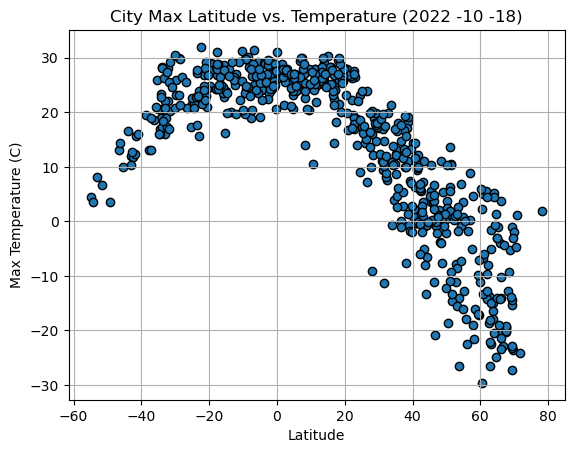

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

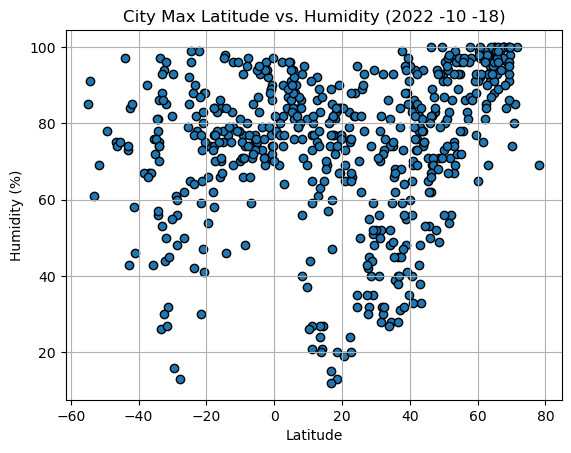

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

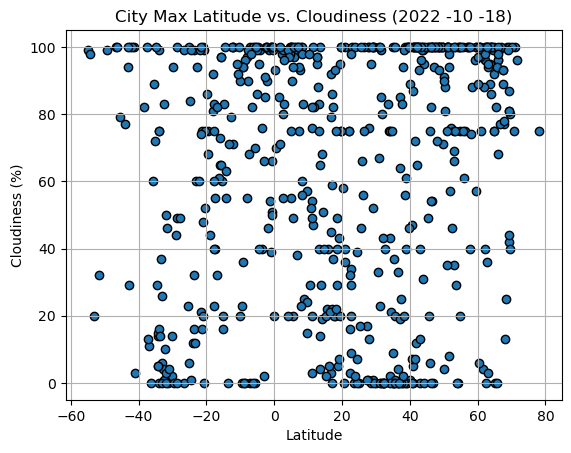

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

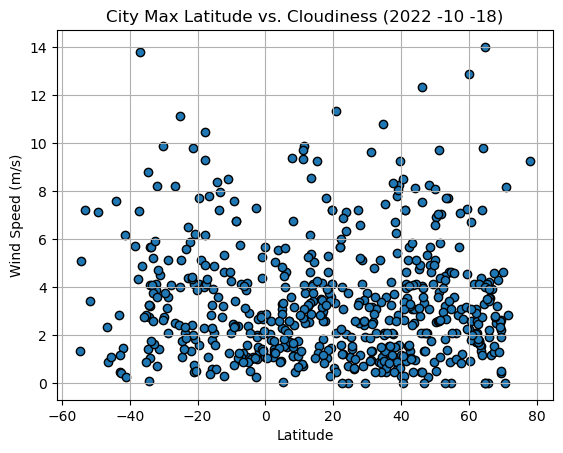

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
from scipy import stats
def lin_regress(x, y):
    correlation = stats.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, correlation
print(lin_regress)

<function lin_regress at 0x000001ADCED99480>


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.00,80,47,9.87,MH,1701044143
2,sa'dah,16.9402,43.7639,14.45,47,59,1.84,YE,1701044143
3,stanley,54.8680,-1.6985,3.62,93,75,0.00,GB,1701044143
6,porto novo,6.4965,2.6036,24.28,90,100,1.49,BJ,1701044143
8,katsuura,35.1333,140.3000,12.36,74,0,1.37,JP,1701044144


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,4.48,85,99,1.34,AR,1701044006
4,waitangi,-43.9535,-176.5597,16.57,97,77,7.60,NZ,1701044143
5,adamstown,-25.0660,-130.1015,21.50,85,100,11.11,PN,1701044143
7,aripuana,-9.1667,-60.6333,24.22,77,36,0.76,BR,1701044143
9,port-aux-francais,-49.3500,70.2167,3.51,78,99,7.11,TF,1701044144


###  Temperature vs. Latitude Linear Regression Plot

The R value is: -0.8831025711087499


Text(0, 0.5, 'Max Temp')

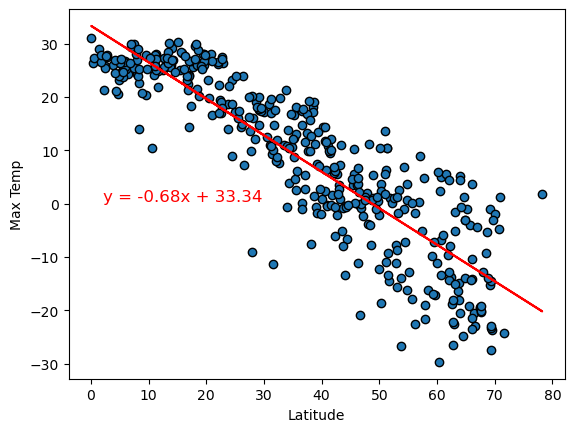

In [51]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (2, 0.5), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The R value is: 0.6572550545354052


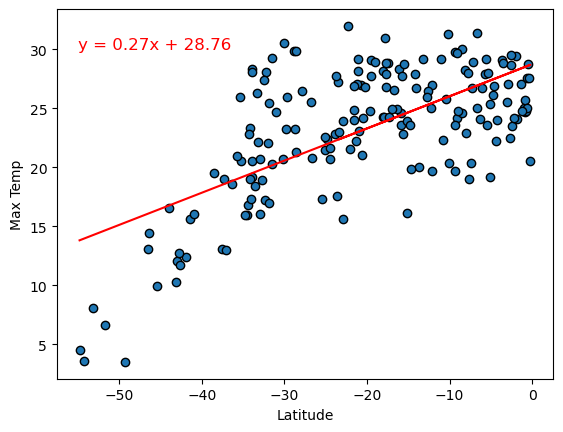

In [53]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-55, 30), color = "red", fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print("The R value is:", r_value[0])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R value is: 0.33140037065785055


Text(0, 0.5, 'Humidity')

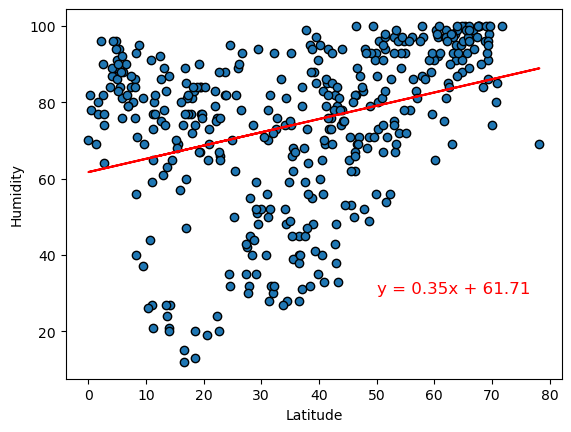

In [56]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (50, 30), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The R value is: 0.24492171289645503


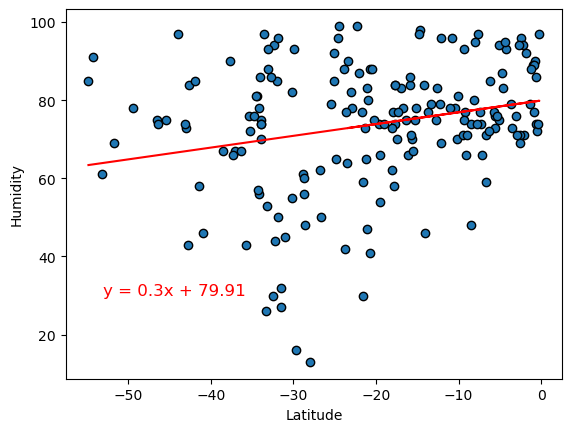

In [57]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-53, 30), color = "red", fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The R value is:", r_value[0])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R value is: 0.16932313495606788


Text(0, 0.5, 'Cloudiness')

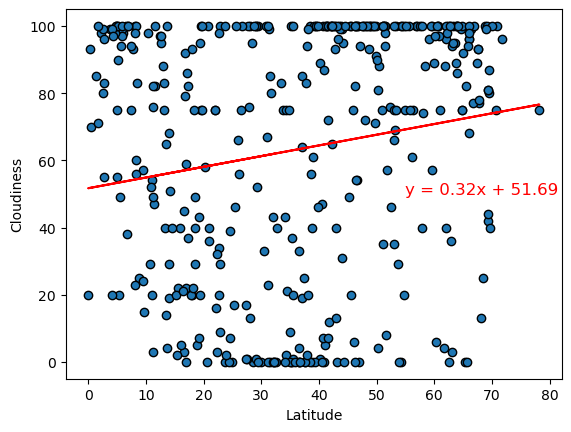

In [59]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (55, 50), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The R value is: 0.20482959374240958


Text(0, 0.5, 'Cloudiness')

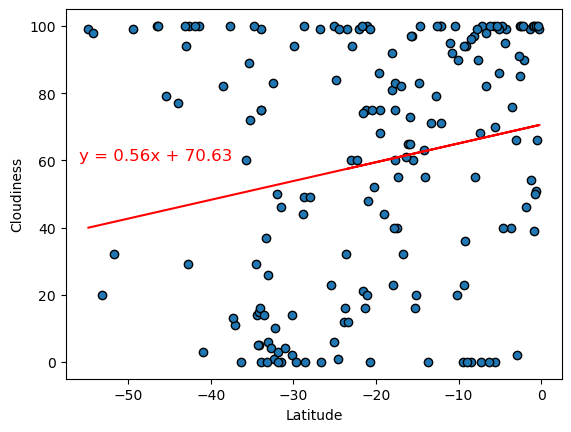

In [62]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-56, 60), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R value is: 0.04011629330355394


Text(0, 0.5, 'Wind Speed')

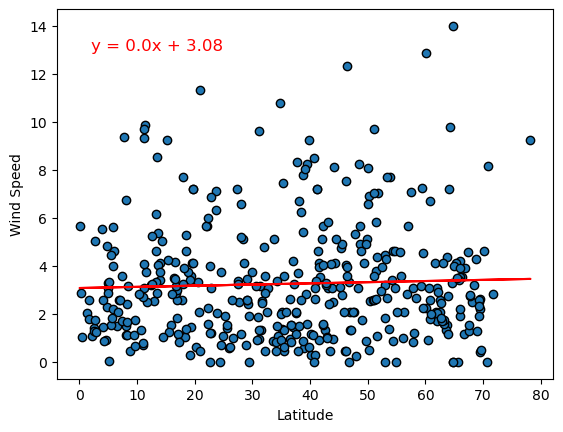

In [64]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (2, 13), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The R value is: -0.17338163127432313


Text(0, 0.5, 'Wind Speed')

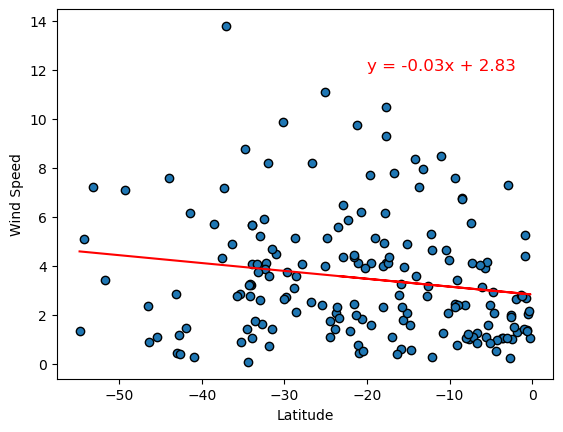

In [66]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-20, 12), color = "red", fontsize = 12)
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE